# Demux trajectory
1. compute all the observables for all the 24 replicas
2. apply demux algorithm
3. take the demuxed trajectory for replica corresponding to T=300K

repeat for all the tetramers

In [1]:
import py3Dmol
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral as dihedral
import numpy as np
import matplotlib.pyplot as plt
import pandas
import time

In [2]:
Sequences=['AAAA','CAAU','CCCC','GACC','UUUU']
#curr_dir='/net/sbp/srnas2/tfrahlki/Simulations'
js=[5,6,6,7,7] # n. of subtrajectories

1. For each tetramer, let's read the total length (n. of frames) of the trajectory for the replica at T=300K (replica n. 6), which is in .xtc files "traj6.%s.%s_proc.xtc" % (Sequence, j) with j=1 to js[i] (js depends on the tetramer); attention, "traj6.%s_proc.xtc" % Sequence is all the trajectory (I suppose), so do not read it since it's too long to keep in memory and use the subtrajectories.

2. Compare with the n. of observables / force field correcting terms you have in your data.

3. This must be equal for all the 24 replicas, whose trajectory is contained in .xtc file "traj_comp%s.xtc" % NR and files "traj_comp%s.part%s.xtc" % (NR, i) with NR n. of replica NR=0...23 and i=0002 to 0310 (310 for all the replicas); attention, the first is "traj_comp%s.xtc" % NR.

Attention: there are repeated frames: the last of each subtrajectories and the first of the subsequent one.

Attention: the first frame of the first trajectory traj.comp%s.xtc must be deleted

In [3]:
n_seq=0
Sequence=Sequences[n_seq]

In [4]:
curr_dir='/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s' % (Sequence,Sequence)
curr_dir

'/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA'

In [5]:
length=0

# whole trajectory (too long to keep in memory, use subtrajectories)
#univ=mda.Universe(curr_dir+'/reference_test.pdb',curr_dir+'/traj6.%s_proc.xtc' % Sequence)
#length+=len(univ.trajectory)

for i in range(js[n_seq]):
    print(i)
    univ=mda.Universe(curr_dir+'/reference_test.pdb',curr_dir+'/traj6.%s.%s_proc.xtc' % (Sequence, i+1))
    length+=len(univ.trajectory)

length

0


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


1017005

In [6]:
data=pandas.read_csv('data/ff_angles%s' % Sequence)
data.shape

(1017000, 6)

In [71]:
NR=6

length2=0

# do not read it???
univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.xtc' % NR)
length2+=len(univ.trajectory)
alphas=[]
alphas.append(univ.select_atoms("name O3' and resid 1","name P and resid 2","name O5' and resid 2","name C5' and resid 2"))
dih=dihedral(alphas).run()
g=dih.results.angles
g=g*np.pi/180

# write numbers from 0002 to 0310 (309 values)
l=[]
for i in range(2,311):
    s='000%s'%i
    s=s[-4:]
    l.append(s)

#"traj_comp%s.part%s.xtc" % (NR, i)
alphas=[]
ff_angles=[]#np.zeros(())
b=np.zeros((0,1))

for i in range(3):#309):
    print(i)
    alphas=[]

    univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i]))
    alphas.append(univ.select_atoms("name O3' and resid 1","name P and resid 2","name O5' and resid 2","name C5' and resid 2"))
    length2+=len(univ.trajectory)

    dih=dihedral(alphas).run()

    #a=dih.results.angles
    #print(a.shape)
    
    ff_angles.append(dih.results.angles)
    #    )=np.concatenate((ff_angles,dih.results.angles),axis=0)
   

    #a=np.array(ff_angles)*np.pi/180
    #print(a.shape)
    #b=np.append(b,np.concatenate((a[0,:,:],a[1,:,:]),axis=1),axis=0)

ff_angles=np.vstack(ff_angles)*np.pi/180

length2 # they are 1.007.309 excluding the first .xtc, 1.017.310 including the first .xtc (/traj_comp%s.xtc)


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element VS found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: VS
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp6.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


0


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp6.part0002.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp6.part0003.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp6.part0004.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


40004

In [65]:
length2

1017310

(40004, 1)
(10001, 1)


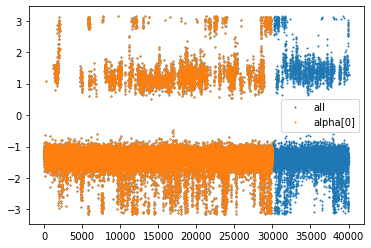

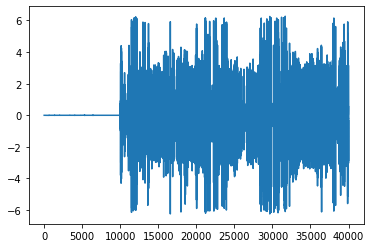

In [100]:
#plt.plot(ff_angles,'.',label='ff_angles')

#plt.plot(g,'.',label='g')

all=np.vstack([g,ff_angles])
print(all.shape)
print(g.shape)
plt.plot(all,'.',label='all',markersize=2)

data=pandas.read_csv('data/ff_angles%s' % Sequence)
plt.plot(data['alpha[0]'][:30000],'.',markersize=2,label='alpha[0]')

#plt.xlim([29000,30000])
plt.legend()

plt.figure()
all=all[:,0]
all=np.delete(all,0)
diff=all-data['alpha[0]'][:len(all)]
plt.plot(diff)


In [95]:
np.shape(all)
#np.shape(data['alpha[0]'][:len(all)])

(40004, 1)

In [88]:
print(len(all))
print(all.T)
print(data['alpha[0]'][:40004])

40004
[[-1.25761344 -1.28829289 -1.35855926 ...  1.59265336  1.30556388
   1.2759706 ]]
0       -1.288291
1       -1.358559
2       -1.264040
3       -1.174882
4       -1.283088
           ...   
39999    1.275976
40000    1.152096
40001    1.491838
40002    1.621936
40003    1.204745
Name: alpha[0], Length: 40004, dtype: float64


In [44]:
print(ff_angles)

arr=np.vstack(ff_angles)
print(np.shape(arr))

print(curr_dir)

print(length2)
print(np.shape(ff_angles))

data=pandas.read_csv('data/ff_anglesAAAA')
print(np.shape(data))


[array([[ -66.51493743],
       [ -79.8746032 ],
       [ -72.11055939],
       ...,
       [-144.47315379],
       [ -70.71562794],
       [ -87.38453232]]), array([[-87.38453232],
       [-84.77168536],
       [-87.69744045],
       ...,
       [-71.90419299],
       [-79.58220917],
       [-74.19044576]]), array([[ -74.19044576],
       [-102.93200914],
       [-111.28142052],
       ...,
       [  63.67546516],
       [ -97.76300537],
       [ -96.85164295]])]
(30003, 1)
/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA
30003
(3, 10001, 1)
(1017000, 6)


In [232]:
ff_angles=np.array(ff_angles)*np.pi/180

/u/i/igilardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: could not broadcast input array from shape (10001,1) into shape (10001)

[[-1.16090466 -1.16090466 -1.16090466 ... -1.16090466 -1.16090466
  -1.16090466]
 [-1.39407481 -1.39407481 -1.39407481 ... -1.39407481 -1.39407481
  -1.39407481]
 [-1.25856669 -1.25856669 -1.25856669 ... -1.25856669 -1.25856669
  -1.25856669]
 ...
 [ 1.26029322  1.26029322  1.26029322 ...  1.26029322  1.26029322
   1.26029322]
 [ 1.04659174  1.04659174  1.04659174 ...  1.04659174  1.04659174
   1.04659174]
 [ 1.18395985  1.18395985  1.18395985 ...  1.18395985  1.18395985
   1.18395985]]
0   -1.288291
1   -1.358559
2   -1.264040
3   -1.174882
4   -1.283088
5   -1.209514
6   -1.580175
7   -1.321827
8   -1.063164
9   -1.168324
Name: alpha[0], dtype: float64


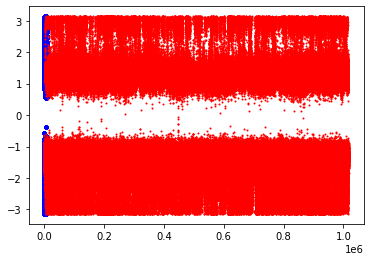

In [226]:
np.shape(data['alpha[0]'])

print(ff_angles[:10])
print(data['alpha[0]'][:10])

plt.plot(ff_angles,'b.')
plt.plot(data['alpha[0]'],'r.',markersize=2)

In [216]:
data['alpha']
plt.plot(data['alpha[0]'],'.')
plt.plot(ff_angles,'.')

,alpha[0],alpha[1],alpha[2],zeta[0],zeta[1],zeta[2]
0,-1.288291,-1.389559,-1.430530,-1.131958,-0.958216,-1.095295
1,-1.358559,-1.458911,-1.263762,-0.816740,-0.844336,-1.309816
2,-1.264040,-1.307111,-1.300115,-1.038067,-0.982047,-1.308080
3,-1.174882,-1.594017,-1.293726,-1.022765,-0.847152,-1.370124
4,-1.283088,-1.286718,-1.119380,-1.176443,-0.967179,-1.289029
...,...,...,...,...,...,...
1016995,-1.298791,-1.532185,-1.418647,-0.968253,-0.675758,-0.735130
1016996,-1.247655,-1.195711,-1.263889,-1.263326,-0.978227,-0.961930
1016997,-1.181565,-1.313690,-1.279943,-0.943951,-0.924044,-0.991764
1016998,-1.128263,-1.192813,-1.386086,-1.469547,-0.779078,-1.036660


there are repeated frames: the last of each subtrajectories and the first of the subsequent one

In [42]:
i=225
univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i]))
univ.trajectory[-1]
print(univ.trajectory.frame)
print(univ.atoms.positions)

i=226
univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i]))
univ.trajectory[0]
print(univ.trajectory.frame)
print(univ.atoms.positions)
#fr=univ.trajectory[0]

2000
[[36.11        5.8400006   4.4300003 ]
 [36.870003    5.8900003   5.0200005 ]
 [38.06        6.13        4.23      ]
 ...
 [35.590004   39.16       19.6       ]
 [ 4.4100003   4.3300004   5.88      ]
 [ 7.9600005   0.96000004 32.06      ]]
0
[[36.11        5.8400006   4.4300003 ]
 [36.870003    5.8900003   5.0200005 ]
 [38.06        6.13        4.23      ]
 ...
 [35.590004   39.16       19.6       ]
 [ 4.4100003   4.3300004   5.88      ]
 [ 7.9600005   0.96000004 32.06      ]]


the two numbers match, do demuxing: compare the positions of all the atoms (including the solvent) at frame i,i+1 (with PBC) through MDAnalysis, and do linear_sum_assignment as in Demux.ipynb; the key point is to keep in memory only couples of frames at a time, in order to not waste memory

two quantities you can use (independently): rather than taking into account PBC, you can exploit the fact that most of the atoms are inside the volume rather than close to the surface, so the average distance is completely different, as also the n. of particles which move only a bit

the first quantity is quite sensitive to the box size: it is true that only few particles cross the border at each step and the most of them are in the bulk, but if the box is very large then the average is highly impacted by this; so, the second quantity avoids this problem

pay attention to the repeated frames (the last of each subtrajectory and the first of the subsequent one): read each subtrajectory from the second frame (except for the first subtrajectory)

### example:

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element VS found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: VS
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp23.part0002.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permissi

51.05


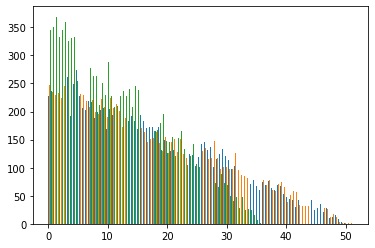

[15.437286]
[7883]
51.05


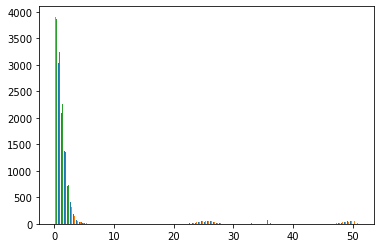

[15.437286, 2.4355752]
[7883, 35517]


In [210]:
i=0
univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i]))

univ.trajectory[5]
x1=univ.atoms.positions

diff1=[] # the mean
diff2=[] # how many >5

for NR in [0,23]:# range(24):
    univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i]))

    univ.trajectory[6]
    x2=univ.atoms.positions

    dx=np.abs(x2-x1)

    diff1.append(np.mean(dx))

    diff2.append(len(np.argwhere(dx.flatten()<5)))

    plt.figure()
    plt.hist(dx,bins=100)
    plt.show()

    print(diff1)
    print(diff2)

### demuxing function

In [211]:
from scipy.optimize import linear_sum_assignment

In [191]:
n_replicas=24


3N with N n. of atoms:  37086


In [203]:
permutations=[]

# for n_seq in [0]:#range(len(Sequences)):
n_seq=0

Sequence=Sequences[n_seq]
curr_dir='/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s' % (Sequence,Sequence)
print('tetramer: ',Sequence)
print(curr_dir)

univ=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp0.part%s.xtc' % l[0])
ncoord=np.shape(univ.atoms.positions.flatten())[0]
print('3N = (with N n. of atoms): ',ncoord)

# initialization of x
x=np.zeros((n_replicas,ncoord))

for NR in range(n_replicas):
    exec('univ'+str(NR)+"=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[0]))")
    exec('univ'+str(NR)+".trajectory[0]")
    exec('x[NR,:]=univ'+str(NR)+'.atoms.positions.flatten()') 

# for i in range(js[n_seq]):
i=0 # index of subtrajectory

for NR in range(n_replicas):
    #path=curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i])
    exec('univ'+str(NR)+"=mda.Universe(curr_dir+'/reference.pdb',curr_dir+'/traj_comp%s.part%s.xtc' % (NR, l[i]))")

# for j in range(1,len(univ)): # for on the frames
j=5 # frame index

x_new=np.zeros((n_replicas,ncoord))
dx=np.zeros((n_replicas,n_replicas,ncoord))

for NR in range(n_replicas):
    exec('univ'+str(NR)+".trajectory[j]")

##x=np.zeros((n_replicas,ncoord))
##x_new=np.zeros((n_replicas,ncoord))
##dx=np.zeros((n_replicas,n_replicas,ncoord))

##for NR in range(n_replicas):
##    exec('x[NR,:]=univ'+str(NR)+'.atoms.positions.flatten()') 

##univ.trajectory[j+1]
##for NR in range(n_replicas):
##    exec('univ'+str(NR)+'.trajectory[j+1]')

##for NR in range(n_replicas):
    exec('x_new[NR,:]=univ'+str(NR)+'.atoms.positions.flatten()')
    for NR2 in range(NR+1):
        dx[NR,NR2,:]=np.abs(x[NR,:]-x_new[NR2,:])
        dx[NR2,NR,:]=dx[NR,NR2,:]
#dx=np.abs(x-x_new)#distance.cdist(x,x_new,'minkowski',p=1)

x=x_new

diff1=np.mean(dx,axis=2)

i0,i1,i2=np.where(dx<5)
diff2=np.histogram2d(i0,i1,bins=np.arange(n_replicas+1))

(rows,cols1)=linear_sum_assignment(diff1)
(rows,cols2)=linear_sum_assignment(1/diff2[0])
if np.array_equal(cols1,cols2):
    permutations.append(permutations[-1][cols2])
else:
    print('error')

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element VS found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: VS
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj_comp0.part0002.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permissio